In [1]:
weather = pd.read_csv("../weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])
station = weather[weather['station_nbr'] == 3]

In [2]:
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
3100,3,2014-10-27,82.0,66.0,74.0,16.0,57.0,63.0,0.0,9.0,...,27,55.370380,75.318476,10.866667,0,0,1,1,1,0
3101,3,2014-10-28,70.0,47.0,58.5,1.0,44.0,51.0,6.0,0.0,...,28,58.502023,57.570552,10.833333,1,0,0,0,0,1
3102,3,2014-10-29,73.0,41.0,57.0,0.0,42.0,50.0,8.0,0.0,...,29,57.184861,57.822427,10.800000,2,0,0,0,0,1
3103,3,2014-10-30,78.0,51.0,64.5,9.0,41.0,51.0,0.0,0.0,...,30,42.166793,63.970968,10.766667,3,0,0,0,0,1
3104,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,31,62.465729,38.046534,10.733333,4,0,0,0,0,1


In [3]:
len(station)

1035

In [4]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 31 ( 3.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 31 ( 3.0 % )
sunset : 31 ( 3.0 % )
codesum : 0 ( 0.0 % )
snowfall : 0 ( 0.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 0 ( 0.0 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 31 ( 3.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [5]:
train = pd.read_csv("../data/train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [6]:
key = pd.read_csv("../data/key.csv")
station = station.merge(key)

In [7]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
304357,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,10.733333,4,0,0,0,0,1,33,107,0
304358,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,10.733333,4,0,0,0,0,1,33,108,0
304359,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,10.733333,4,0,0,0,0,1,33,109,0
304360,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,10.733333,4,0,0,0,0,1,33,110,0
304361,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,10.733333,4,0,0,0,0,1,33,111,0


In [8]:
station['log1p_units'] = np.log1p(station.units)

In [9]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 다시 OLS

In [10]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
304357,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,38.046534,10.733333,4,0,0,0,0,1,33,107
304358,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,38.046534,10.733333,4,0,0,0,0,1,33,108
304359,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,38.046534,10.733333,4,0,0,0,0,1,33,109
304360,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,38.046534,10.733333,4,0,0,0,0,1,33,110
304361,3,2014-10-31,55.0,33.0,44.0,-12.0,32.0,41.0,21.0,0.0,...,38.046534,10.733333,4,0,0,0,0,1,33,111


In [11]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

### 1. OLS : df1 (units) 

In [12]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + C(year) + C(month) + relative_humility + windchill + weekend \
                            + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     1259.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:12:48   Log-Likelihood:            -1.1806e+06
No. Observations:              304362   AIC:                         2.361e+06
Df Residuals:                  304188   BIC:                         2.363e+06
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]      4.9951      6

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [13]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1260.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:13:38   Log-Likelihood:            -1.1798e+06
No. Observations:              304362   AIC:                         2.360e+06
Df Residuals:                  304186   BIC:                         2.362e+06
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [14]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

6833

In [15]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
0,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,1,0
1,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,2,0
2,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,3,0
3,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,4,0
4,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,6,0
5,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,7,0
6,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,8,0
7,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,10,0
8,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,11,0
9,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,12,0


In [16]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     7232.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:14:39   Log-Likelihood:            -6.0946e+05
No. Observations:              297529   AIC:                         1.219e+06
Df Residuals:                  297353   BIC:                         1.221e+06
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

R square 약간 상승, conditional number에 전혀 변화가 없다...

### 3-1. OLS :  df1 (units) - 아웃라이어 제거 + tmax/tmin/tavg 제거 + dewpoint/wetbulb제거 + stnpressure/sealevel제거 + resultdir제거

In [35]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1474.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:40:04   Log-Likelihood:            -1.2930e+05
No. Observations:              101946   AIC:                         2.589e+05
Df Residuals:                  101813   BIC:                         2.601e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(year)[2012]           

### 4. 변수변환 : df2 (log1p_units) 

In [17]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1328.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:15:36   Log-Likelihood:            -1.9106e+05
No. Observations:              304362   AIC:                         3.825e+05
Df Residuals:                  304186   BIC:                         3.843e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야할 거 같다.

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [20]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)/len(df2)

0.05546027427865502

In [21]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
0,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,1,0.0
1,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,2,0.0
2,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,3,0.0
3,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,4,0.0
4,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,6,0.0
5,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,7,0.0
6,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,10,0.0
7,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,11,0.0
8,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,12,0.0
9,3,2012-01-01,55.0,34.0,44.5,9.0,24.0,36.0,20.0,0.0,...,9.750000,6,1,0,0,0,1,21,13,0.0


In [22]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.609e+04
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:16:58   Log-Likelihood:             5.6106e+05
No. Observations:              287482   AIC:                        -1.122e+06
Df Residuals:                  287306   BIC:                        -1.120e+06
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

설명력이 더 올라갔다.(0.907), conditional number는 그대로

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [44]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3855.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:06:02   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99622   BIC:                        -2.107e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

변화없음.(5번 결과와 동일)

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg제거(VIF에 근거)

In [56]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3900.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:23:04   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99624   BIC:                        -2.107e+05
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

그래도 conditional number가 243....

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg제거 + wetbulb/dewpoint(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [66]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3946.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:36:36   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99626   BIC:                        -2.107e+05
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

wetbulb, dewpoint추가로 지웠더니 conditional number 20감소...(?!)

### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

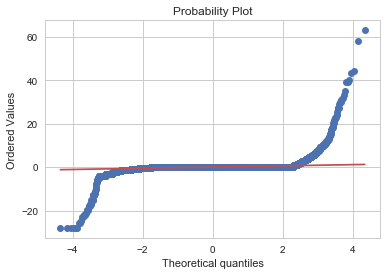

In [80]:
sp.stats.probplot(result1_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

##### 1) tmax~cool까지의 VIF를 본다.

In [21]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill',
       'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY',
       'nothing', 'store_nbr', 'item_nbr', 'log1p_units'],
      dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax','tmin','tavg','dewpoint','wetbulb','heat','cool','preciptotal','stnpressure','sealevel','resultspeed','avgspeed','relative_humility','windchill']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,tmax
1,inf,tmin
2,inf,tavg
3,2.839245e+03,dewpoint
4,3.362897e+03,wetbulb
5,1.425238e+02,heat
6,6.376910e+01,cool
7,1.291897e+00,preciptotal
8,1.327780e+06,stnpressure
9,1.353673e+06,sealevel


tmax, tmin, tavg를 빼고 df2_1을 다시 OLS돌려본다(위로위로~)

##### VIF : 2) dewpoint, wetbulb, heat, cool로 VIF를 돌려본다.

In [24]:
cols = ['dewpoint','wetbulb','heat','cool','preciptotal','stnpressure','sealevel','resultspeed','avgspeed','relative_humility','windchill']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,2.726382e+03,dewpoint
1,3.272458e+03,wetbulb
2,1.309410e+02,heat
3,5.804585e+01,cool
4,1.271827e+00,preciptotal
5,1.310766e+06,stnpressure
6,1.335325e+06,sealevel
7,2.214524e+01,resultspeed
8,3.585577e+01,avgspeed
9,5.714904e+02,relative_humility


df2_1에서 sealevel를 제거하고 OLS돌려본다.

##### VIF : sealevel제거 후 다시 돌리자.

In [26]:
cols = ['dewpoint','wetbulb','heat','cool','preciptotal','stnpressure','resultspeed','avgspeed','relative_humility','windchill']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,2694.206594,dewpoint
1,3249.888965,wetbulb
2,122.941919,heat
3,53.218998,cool
4,1.270815,preciptotal
5,2130.568446,stnpressure
6,21.708602,resultspeed
7,35.516687,avgspeed
8,568.496509,relative_humility
9,2342.812485,windchill


wetbulb를 버린다.

### VIF : wetbulb 버리고 다시 

In [28]:
cols = ['dewpoint','heat','cool','preciptotal','stnpressure','resultspeed','avgspeed','relative_humility','windchill']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,1759.676639,dewpoint
1,112.873171,heat
2,51.374178,cool
3,1.270616,preciptotal
4,1522.750025,stnpressure
5,21.698925,resultspeed
6,35.316953,avgspeed
7,550.683024,relative_humility
8,2296.621495,windchill


### VIF : windchill 버리고 다시 

In [30]:
cols = ['dewpoint','heat','cool','preciptotal','stnpressure','resultspeed','avgspeed','relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,954.963753,dewpoint
1,81.499823,heat
2,34.950614,cool
3,1.266215,preciptotal
4,241.993861,stnpressure
5,21.616475,resultspeed
6,34.282310,avgspeed
7,310.721172,relative_humility


### VIF : dewpoint 버리고 다시 

In [32]:
cols = ['heat','cool','preciptotal','stnpressure','resultspeed','avgspeed','relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,2.507487,heat
1,2.467766,cool
2,1.252062,preciptotal
3,35.341743,stnpressure
4,21.541139,resultspeed
5,34.181559,avgspeed
6,22.406532,relative_humility


### VIF : stnpressure버리고 다시 

In [34]:
cols = ['heat','cool','preciptotal','resultspeed','avgspeed','relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,2.097118,heat
1,2.024574,cool
2,1.174997,preciptotal
3,20.759926,resultspeed
4,29.645888,avgspeed
5,6.528698,relative_humility


### VIF : avgspeed 버리고 다시 

In [36]:
cols = ['heat','cool','preciptotal','resultspeed','relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,2.084640,heat
1,2.018566,cool
2,1.168379,preciptotal
3,3.583955,resultspeed
4,4.997204,relative_humility


### VIF 결과 : OLS 성능

In [38]:
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + C(year) + C(month) + scale(relative_humility) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 2.133e+04
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:23:01   Log-Likelihood:             5.6104e+05
No. Observations:              287482   AIC:                        -1.122e+06
Df Residuals:                  287349   BIC:                        -1.120e+06
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(year)[2012]           

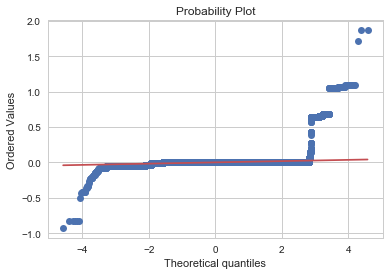

In [39]:
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### case: 
- 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + tmax/tmin/tavg제거 + wetbulb/dewpoint(VIF에 근거) + sealevel/stnpressure제거 + resultdir제거(전부 p-value가 유의하지 않음) + item_nbr제거(하나빼고 다 유의하지 않음)

In [75]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.625
Date:                Wed, 04 Jul 2018   Prob (F-statistic):             0.0324
Time:                        16:06:16   Log-Likelihood:                 4699.6
No. Observations:              100227   AIC:                            -9353.
Df Residuals:                  100204   BIC:                            -9134.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(year)[2012]           

- R square 0.000, conditional number 30.6. 
- conditional을 확 줄이는 대신 R square도 확 증발시킴.

##### 9.  다중공선성 감소시키기 : PCA

In [166]:
from patsy import dmatrix
formula = "scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool) \
        + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed) \
        + scale(avgspeed) + scale(relative_humility) + scale(windchill) + C(item_nbr) \
        + C(store_nbr) + C(weekend) + C(rainY) + C(otherY) + C(nothing) + 0"

In [184]:
dfX = dmatrix(formula, station, return_type="dataframe")
dfy = pd.DataFrame(target1, columns=["units"])

In [185]:
idx = list(set(range(len(df2))).difference(idx_outlier))
dfX = dfX.iloc[idx, :].reset_index(drop=True)
dfy = dfy.iloc[idx, :].reset_index(drop=True)

##### ***tmax, tmin빠져서 conditional number 감소

In [187]:
model_units = sm.OLS(np.log1p(dfy), dfX)
result_units = model_units.fit()
print(result_units.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     5177.
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:12:26   Log-Likelihood:             1.0576e+05
No. Observations:              100227   AIC:                        -2.113e+05
Df Residuals:                  100100   BIC:                        -2.101e+05
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(item_nbr)[1]          

In [192]:
from sklearn.decomposition import PCA

In [222]:
dfX2 = sm.add_constant(pd.DataFrame(PCA(n_components=25).fit_transform(dfX)))
model_units2 = sm.OLS(np.log1p(dfy), dfX2)
result_units2 = model_units2.fit()
print(result_units2.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9492
Date:                Tue, 03 Jul 2018   Prob (F-statistic):              0.535
Time:                        22:32:55   Log-Likelihood:                 4693.6
No. Observations:              100227   AIC:                            -9335.
Df Residuals:                  100201   BIC:                            -9088.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0216      0.001     29.595      0.0

R square가 0.00....

##### 9.  다중공선성 감소시키기 : 정규화

In [251]:
# 6번 model 사용
# 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)
result2 = model2_1_1.fit_regularized(alpha=0.001, L1_wt=0)

In [252]:
result2.params[result2.params>0]

array([  3.58580529e-02,   3.99312686e-03,   1.57665750e-03,
         2.11581000e-04,   3.58340176e-05,   4.76181011e-04,
         1.89128572e-03,   9.86646007e-04,   7.60515755e-04,
         5.47372719e-04,   1.60316771e-03,   5.26146706e-04,
         1.60817896e-03,   3.43405592e-03,   2.19358654e-03,
         2.68244675e-04,   2.21284910e-03,   9.75160150e-04,
         4.82601106e-03,   3.15856468e-03,   2.47061093e-03,
         1.18650669e-03,   1.71886890e-04,   5.04179686e-04,
         1.67009949e-03,   6.95788229e-05,   2.45767337e-03,
         6.47912182e-03,   6.29617307e-03,   4.51900328e-03,
         1.89608259e-03,   2.36286988e+00,   1.38127288e+00,
         2.06362800e-02,   2.82759464e-01,   6.68210348e-02,
         9.56244084e-03,   8.60860426e-02,   3.21597242e-04,
         2.73822032e-04,   3.04356962e-04,   3.79611132e-03,
         5.91182647e-03,   2.69448899e-04,   9.29692978e-04,
         1.39670268e-03,   2.23730090e-03])

### 10. Cross validation(교차검증)

In [40]:
from patsy import dmatrix

In [41]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [42]:
len(df2_1_X), len(df2_1_target)

(287482, 287482)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [43]:
formula = 'scale(heat) + scale(cool)\
        + scale(preciptotal) + scale(resultspeed)  \
        + C(year) + C(month) + scale(relative_humility) + C(weekend) \
        + C(rainY) + C(store_nbr) + C(item_nbr) + 0'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([ 0.88604396,  0.78113654,  0.82138774,  0.921798  ,  0.91767143,
        0.82139402,  0.91951868,  0.96987956,  0.93609798,  0.91720111])

### station 평균성능

In [45]:
scores.mean() 

0.88921290313485102

현재의 모델을 사용해도 될 것으로 판단.

In [44]:
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + C(year) + C(month) + scale(relative_humility) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     5021.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:03:49   Log-Likelihood:             1.0580e+05
No. Observations:              100227   AIC:                        -2.113e+05
Df Residuals:                  100096   BIC:                        -2.101e+05
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(year)[2012]           

In [116]:
# 정규화  result1 = Ridge 모형
result1 = model.fit_regularized(alpha=0.1, L1_wt=0)

# 정규화  result2 = Lasso 모형
result2 = model.fit_regularized(alpha=0.1, L1_wt=1)

# 정규화  result3 = Elastic Net 모형
result3 = model.fit_regularized(alpha=0.1, L1_wt=0.5)

0.86526561489325327

여기까지

In [117]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# from sklearn.model_selection import KFold

# model = LinearRegression()
# cv = KFold(5, random_state=0)

# for train_index, test_index in cv.split(df2_1_X):
#     print("test index :", test_index, len(test_index))
#     print("." * 80)
#     print("train index:", train_index, len(train_index))
#     print("=" * 80)

#     X_train = df2_1_X.loc[train_index, :]
#     X_test = df2_1_X.loc[test_index, :]
#     y_train = df2_1_target.loc[train_index, :]
#     y_test = df2_1_target.loc[test_index, :]
    
#     tmp_data = pd.concat([X_train, y_train], axis = 1)


#     model = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool) + scale(preciptotal) + scale(resultspeed) + scale(avgspeed) \
#                                 + C(year) + C(month) + scale(relative_humility) + scale(windchill) \
#                                 + C(weekend) + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data=tmp_data)
#     result = model.fit()
    
#     y_hat = result.predict(X_test)
    
#     print(((y_hat - y_hat.mean())**2).sum()  / ((y_test-y_test.mean())**2).sum() )

In [60]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv = KFold(5)
cross_val_score(model, dfX, dfy, scoring="r2", cv=cv)

array([ 0.9762711 ,  0.88227912,  0.85968661,  0.7786411 ,  0.81481606])

In [63]:
sum([0.9762711, 0.88227912, 0.85968661,0.7786411, 0.81481606])/5

0.862338798

In [113]:
# station = station[station["units"] > 0].reset_index(drop=True)

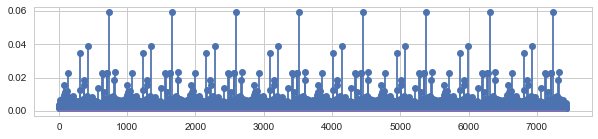

In [150]:
# set(range(len(station)))
# len(stn_real)
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

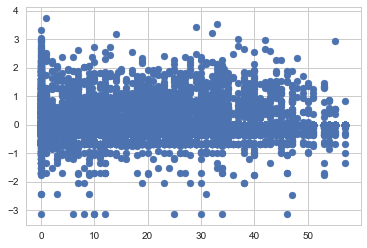

In [169]:
# 이분산성 확인
plt.scatter(df['heat'], result.resid)
plt.show()

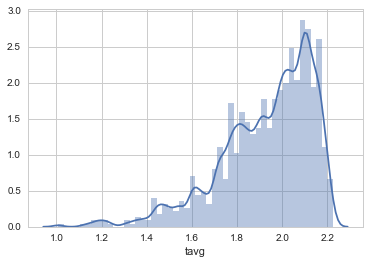

In [185]:
sns.distplot((np.log(np.sqrt(station['tavg']))))
plt.show()

In [54]:
a, (b, c) = enumerate(cv.split(dfX))

ValueError: too many values to unpack (expected 2)